## Create a model that recognizes 17 types of flowers for the "17 Category Flower Dataset".
### Perform transfer learning based on VGG16.
- For the layers you add yourself, see the notebook shared in the lecture.
You can also add new layers by yourself.
- Draw a graph of the accuracy of the learning result and the value of the loss function.
- Collect and identify images that have not been used for learning or evaluation, such as by searching the net.
  

1.   Predict three or more flower images out of 17 kinds.
2.   If there is an image that cannot be identified, what kind of image is difficult to identify?

Lecture Comments
– Good points, bad points, what you wanted to include in the lecture, what you did not need

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

### Load the dataset 17flowers_all.zip from Google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!cp /content/drive/My\ Drive/17flowers_all.zip .
!unzip 17flowers_all.zip

Archive:  17flowers_all.zip
   creating: 17flowers_all/
  inflating: 17flowers_all/17flowers-labels.txt  
   creating: 17flowers_all/test/
   creating: 17flowers_all/test/Bluebell/
  inflating: 17flowers_all/test/Bluebell/image_0300.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0301.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0302.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0303.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0304.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0305.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0306.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0307.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0308.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0309.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0310.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0311.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0312.jpg  
  inflating: 17flowers_all/test/Bluebell/image_0313.jpg  
  infla

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pprint import pprint
from tensorflow.keras.optimizers import Adam, SGD

### Predict the flowers with vgg16 model

In [7]:
model_vgg16 = tf.keras.applications.vgg16.VGG16(weights='imagenet')
model_vgg16.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

17flowers_all/train/Daffodil/image_0001.jpg


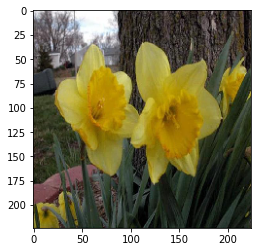

40960/35363 [==================================] - 0s 0us/step
[[('n03930313', 'picket_fence', 0.68740827),
  ('n04522168', 'vase', 0.093458764),
  ('n11879895', 'rapeseed', 0.06590606),
  ('n03991062', 'pot', 0.016354633),
  ('n07718472', 'cucumber', 0.015494619)]]
17flowers_all/train/Iris/image_0404.jpg


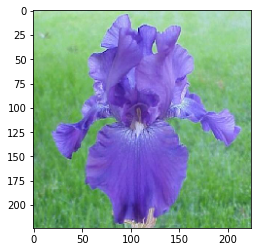

[[('n02206856', 'bee', 0.28752935),
  ('n11879895', 'rapeseed', 0.048384935),
  ('n03325584', 'feather_boa', 0.03314757),
  ('n02280649', 'cabbage_butterfly', 0.026568731),
  ('n02190166', 'fly', 0.026493749)]]


In [8]:
fileList = ["17flowers_all/train/Daffodil/image_0001.jpg","17flowers_all/train/Iris/image_0404.jpg"]

for path in fileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = model_vgg16.predict(img[tf.newaxis, ...])
    result = tf.keras.applications.vgg16.decode_predictions(predict, top=5)
    pprint(result)

### Build a new model to classify

In [9]:
baseModel = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=False, 
                                              input_tensor=tf.keras.Input(shape=(224, 224, 3)))
baseModel.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [24]:
newModel = tf.keras.Sequential([
          baseModel,
          #tf.keras.layers.BatchNormalization,
          tf.keras.layers.Flatten(),
          Dense(128, activation='relu'),
          tf.keras.layers.Dense(17, activation='softmax')
])

for layer in baseModel.layers:
  layer.trainable = False

newModel.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

newModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_8 (Dense)              (None, 17)                2193      
Total params: 17,928,273
Trainable params: 3,213,585
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
import tensorflow.keras.preprocessing.image as Image

train_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)


validation_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

BATCH_SIZE = 1

train_generator = train_datagen.flow_from_directory(
   '17flowers_all/train',
   target_size=(224, 224),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
   '17flowers_all/test',
   target_size=(224, 224),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [27]:
history = newModel.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    epochs=6
)

Epoch 1/6
1020/1020 [==============================] - 724s 710ms/step - loss: 5.9824 - accuracy: 0.1647 - val_loss: 2.7898 - val_accuracy: 0.1853
Epoch 2/6
1020/1020 [==============================] - 729s 714ms/step - loss: 2.6303 - accuracy: 0.2422 - val_loss: 2.5405 - val_accuracy: 0.1794
Epoch 3/6
1020/1020 [==============================] - 730s 716ms/step - loss: 2.7205 - accuracy: 0.2412 - val_loss: 2.6695 - val_accuracy: 0.1618
Epoch 4/6
1020/1020 [==============================] - 728s 714ms/step - loss: 2.5577 - accuracy: 0.2069 - val_loss: 2.7112 - val_accuracy: 0.1382
Epoch 5/6
1020/1020 [==============================] - 727s 713ms/step - loss: 2.4573 - accuracy: 0.2029 - val_loss: 2.7816 - val_accuracy: 0.1441
Epoch 6/6
1020/1020 [==============================] - 732s 717ms/step - loss: 2.3789 - accuracy: 0.2029 - val_loss: 2.7928 - val_accuracy: 0.1500


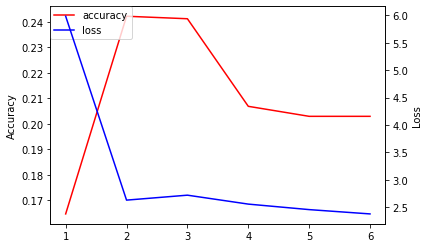

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs = 6

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(1, epochs+1), history.history['accuracy'], label="accuracy",c='r')
ax2.plot(range(1, epochs+1), history.history['loss'], label="loss",c='b')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

plt.show()

As it is shown in the plotting, the training accuracy and testing accuracy is not as good as expected.

17flowers_all/test/Bluebell/image_0300.jpg


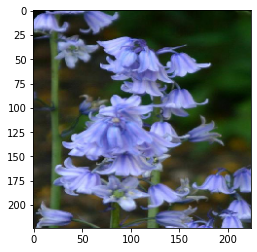

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013
17flowers_all/test/Fritillary/image_0700.jpg


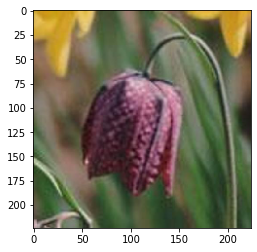

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013
17flowers_all/test/Snowdrop/image_0140.jpg


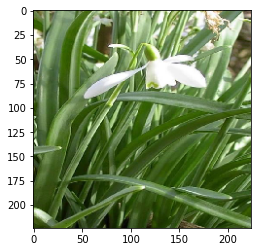

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013


In [33]:
testfileList = ["17flowers_all/test/Bluebell/image_0300.jpg",
            "17flowers_all/test/Fritillary/image_0700.jpg",
            "17flowers_all/test/Snowdrop/image_0140.jpg",]

for path in testfileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = newModel.predict(img[tf.newaxis, ...])
    print(labels[np.argmax(predict)])
    for i in range(len(labels)):
        print(labels[i],predict[0][i])


All of the flowers are predicted as tulip!!!

### Predict flowers using images that are not in training set or testing set.

In [10]:
!cp /content/drive/My\ Drive/flowers_new_images.zip .
!unzip flowers_new_images.zip

Archive:  flowers_new_images.zip
   creating: flowers_new_images/
  inflating: __MACOSX/._flowers_new_images  
  inflating: flowers_new_images/.DS_Store  
  inflating: __MACOSX/flowers_new_images/._.DS_Store  
  inflating: flowers_new_images/new_tulip.jpeg  
  inflating: __MACOSX/flowers_new_images/._new_tulip.jpeg  
  inflating: flowers_new_images/new_dandelion.jpeg  
  inflating: __MACOSX/flowers_new_images/._new_dandelion.jpeg  
  inflating: flowers_new_images/new_iris.jpeg  
  inflating: __MACOSX/flowers_new_images/._new_iris.jpeg  
  inflating: flowers_new_images/new_windflower.jpeg  
  inflating: __MACOSX/flowers_new_images/._new_windflower.jpeg  


flowers_new_images/new_tulip.jpeg


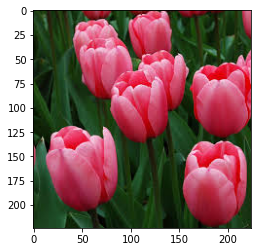

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013
flowers_new_images/new_dandelion.jpeg


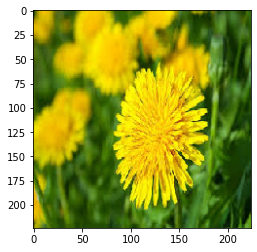

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013
flowers_new_images/new_iris.jpeg


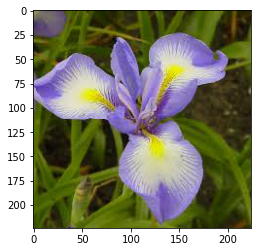

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013
flowers_new_images/new_windflower.jpeg


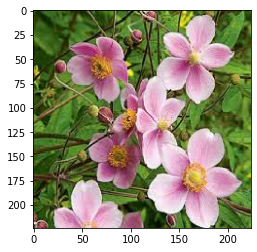

Tulip
Tulip 0.061979026
Dandelion 0.05875232
Iris 0.061950695
Windflower 0.06095013


In [31]:
newfileList = ["flowers_new_images/new_tulip.jpeg",
               "flowers_new_images/new_dandelion.jpeg",
               "flowers_new_images/new_iris.jpeg",
               "flowers_new_images/new_windflower.jpeg",]

labels = ["Tulip", "Dandelion", "Iris", "Windflower"]

for path in newfileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = newModel.predict(img[tf.newaxis, ...])
    print(labels[np.argmax(predict)])
    for i in range(len(labels)):
        print(labels[i],predict[0][i])

All of the four flowers are predicted as tulip, which is not what we expect. 

### Why do the other flowers not get classified correctly?

The first reason may be the accuracy of the model is not high enough.

The second reason may be the number of images for training is not large enough.

The third reason may be the CNN model is not revised as to classify flowers, because imagenet contains many things that are not flowers. 

### Design a new model, with all vgg16 layers freezing but the number of neurons in final fully-connected layer increases to 256, and add a dropout layer to prevent overfitting. The optimizer is changed to Adam.

In [21]:
newModel_1 = tf.keras.Sequential([
          baseModel,
          #tf.keras.layers.BatchNormalization,
          tf.keras.layers.Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.5),
          tf.keras.layers.Dense(17, activation='softmax')
])

for layer in baseModel.layers:
  layer.trainable = False

newModel_1.compile(optimizer = 'Adam', loss='categorical_crossentropy',metrics=['accuracy'])

newModel_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                4369      
Total params: 21,141,841
Trainable params: 6,427,153
Non-trainable params: 14,714,688
_________________________________________________________________


### For the hyper-parameters, the bacth size is changed to 32, because 32 is the most commonly adopted parameter for mini-batch training.

In [22]:
import tensorflow.keras.preprocessing.image as Image

train_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)


validation_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

BATCH_SIZE_1 = 32

train_generator_1 = train_datagen.flow_from_directory(
   '17flowers_all/train',
   target_size=(224, 224),
   batch_size=BATCH_SIZE_1,
   class_mode='categorical',
   shuffle=True
)

validation_generator_1 = validation_datagen.flow_from_directory(
   '17flowers_all/test',
   target_size=(224, 224),
   batch_size=BATCH_SIZE_1,
   class_mode='categorical',
   shuffle=True
)

Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


### Considering the long time for training, the earlystopping and checkpoint is taken for saving the model parameters and the progress of training.

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose=2, patience=25)
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/best_model_1.h5', monitor='val_acc', verbose=2, save_best_only=True)



In [24]:
history_1 = newModel_1.fit(
    train_generator_1,
    steps_per_epoch=train_generator_1.n // BATCH_SIZE_1,
    validation_data=validation_generator_1,
    validation_steps=validation_generator_1.n // BATCH_SIZE_1,
    epochs=5,
    callbacks = [es,mc]
)

Epoch 1/5
31/31 [==============================] - 642s 21s/step - loss: 9.8046 - accuracy: 0.5496 - val_loss: 2.7329 - val_accuracy: 0.6500
Epoch 2/5
31/31 [==============================] - 640s 21s/step - loss: 1.7222 - accuracy: 0.7925 - val_loss: 2.7263 - val_accuracy: 0.5875
Epoch 3/5
31/31 [==============================] - 643s 21s/step - loss: 1.1731 - accuracy: 0.8532 - val_loss: 3.2812 - val_accuracy: 0.6625
Epoch 4/5
31/31 [==============================] - 647s 21s/step - loss: 1.1717 - accuracy: 0.8755 - val_loss: 2.8731 - val_accuracy: 0.6781
Epoch 5/5
31/31 [==============================] - 647s 21s/step - loss: 1.0035 - accuracy: 0.8785 - val_loss: 1.9132 - val_accuracy: 0.7344


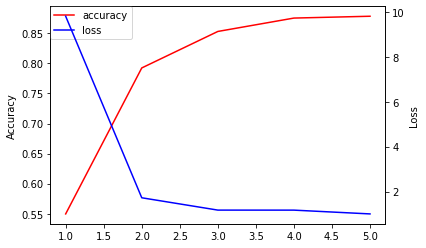

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs = 5

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(1, epochs+1), history_1.history['accuracy'], label="accuracy",c='r')
ax2.plot(range(1, epochs+1), history_1.history['loss'], label="loss",c='b')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

plt.show()

The training accuracy and validation accuracy has been drastically increased with change of bacth size !!!

### Predict the same images using the new model.

['Daffodil\n', 'Snowdrop\n', 'LilyValley\n', 'Bluebell\n', 'Crocus\n', 'Iris\n', 'Tigerliliy\n', 'Tulip\n', 'Fritillary\n', 'Sunflower\n', 'Daisy\n', "Colts'Foot\n", 'Dandelion\n', 'Cowslip\n', 'Buttercup\n', 'Windflower\n', 'Pansy\n']
flowers_new_images/new_tulip.jpeg


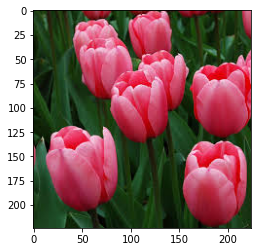

Crocus

4
Tulip 1.151754e-06
Dandelion 1.9675811e-11
Iris 1.2086557e-13
Windflower 8.2600886e-13
flowers_new_images/new_dandelion.jpeg


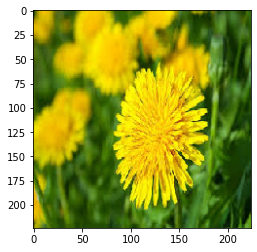

Tulip

7
Tulip 5.186646e-16
Dandelion 1.9345249e-13
Iris 8.6336265e-11
Windflower 1.4475702e-19
flowers_new_images/new_iris.jpeg


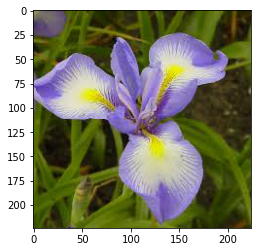

Colts'Foot

11
Tulip 9.753186e-18
Dandelion 1.2037681e-12
Iris 4.9870894e-17
Windflower 1.5123078e-27
flowers_new_images/new_windflower.jpeg


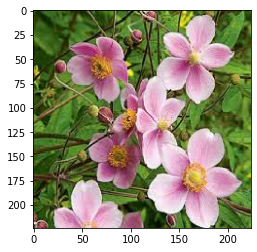

Pansy

16
Tulip 0.0050018
Dandelion 0.000729627
Iris 1.8111986e-06
Windflower 0.009620823


In [63]:
newfileList = ["flowers_new_images/new_tulip.jpeg",
               "flowers_new_images/new_dandelion.jpeg",
               "flowers_new_images/new_iris.jpeg",
               "flowers_new_images/new_windflower.jpeg",]

labels = ["Tulip", "Dandelion", "Iris", "Windflower"]

with open('/content/drive/My Drive/17flowers-labels.txt','r') as f:
    newlabels = f.readlines()

newlabels = newlabels[0:17]

print(newlabels)

for path in newfileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = newModel_1.predict(img[tf.newaxis, ...])
    print(newlabels[np.argmax(predict)])
    print(np.argmax(predict))
    for i in range(len(labels)):
        print(labels[i],predict[0][i])


Using the new model and new hyper-parameters, the accuracy of classification increases a bit, given the specific labels, such as the windflower. But the classification using the original labels is still not accurate. 

### Lecture Comments

Many Thanks to Kitamura sensei! This lecture is very interesting and inspiring for my own research topic. I did have a lot of fun learning different machine learning techniques and deep learning models.

I would like to appreciate Sensei's patient preparation for us to do homeworks smoothly. Sensei's framework can be very good reference.

I have some small suggestions. 

The first one is that this course may be better going if it can be a two-quarter lectures because it contains many difficult contents. Many detalis and important techniques may not be fully understood in seven lectures. 

The second one is my own interest, that I am wondering the application of machine learning techniques in practical situation, not only in the well-designed dataset. I would appreciate it if Sensei could introduce more application of ML techniques.

Once again, thanks to Sensei for your wonderful lectures! 
